In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from dt_apriltags import Detector

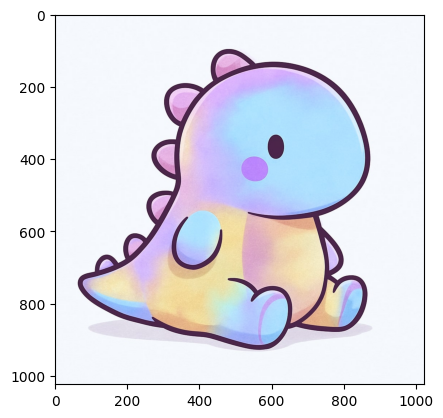

In [7]:
img = cv2.imread('image.jpg')
plt.imshow(img)

In [8]:
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()

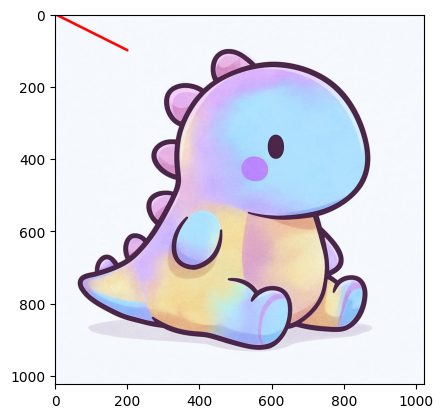

In [9]:
cv2.line(img, (0, 0), (200, 100), (255, 0, 0), 5)
# cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
# cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
# pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
# pts = pts.reshape((-1, 1, 2))
# cv2.polylines(img, [pts], True, (0, 255, 255), 5)
# cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

plt.imshow(img)

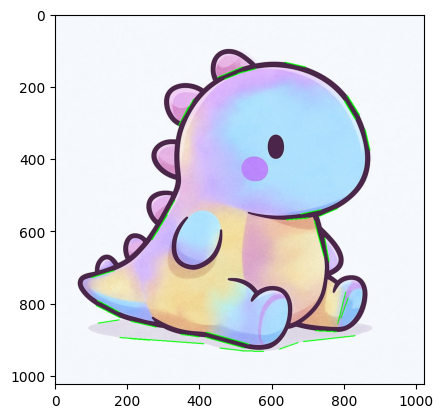

In [11]:
img = cv2.imread('image.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                30,
                minLineLength=50,
                maxLineGap=10,
        ) # detect lines

"""
From opencv website:

dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
lines: A vector that will store the parameters (xstart,ystart,xend,yend) of the detected lines. Returned by HoughLinesP
rho : The resolution of the parameter r in pixels. We use 1 pixel.
theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
threshold: The minimum number of intersections to "*detect*" a line
minLineLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
maxLineGap: The maximum gap between two points to be considered in the same line.
"""

for line in lines:
    x1, y1, x2, y2 = line[0] 
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)

[Detection object:
tag_family = b'tag36h11'
tag_id = 60
hamming = 0
decision_margin = 24.732818603515625
homography = [[1.12852846e+01 1.35218628e+01 1.50604021e+02]
 [4.12931891e-01 1.34012105e+01 9.97275963e+01]
 [7.54358942e-03 3.97360209e-02 1.00000000e+00]]
center = [150.60402144  99.72759634]
corners = [[148.07374573 109.20044708]
 [167.49220276 108.4158783 ]
 [153.30262756  89.62454987]
 [132.03965759  90.17698669]]
pose_R = None
pose_t = None
pose_err = None
, Detection object:
tag_family = b'tag36h11'
tag_id = 82
hamming = 0
decision_margin = 24.04063606262207
homography = [[ 8.02054019e+00  3.10314575e+00  4.66621306e+02]
 [-8.49221724e-01  1.06309763e+01  8.20201682e+01]
 [-3.96118917e-03  1.89261753e-02  1.00000000e+00]]
center = [466.62130564  82.02016819]
corners = [[451.37316895  91.40827179]
 [470.70095825  90.44836426]
 [482.58377075  72.19226074]
 [462.41769409  73.33588409]]
pose_R = None
pose_t = None
pose_err = None
, Detection object:
tag_family = b'tag36h11'
tag_

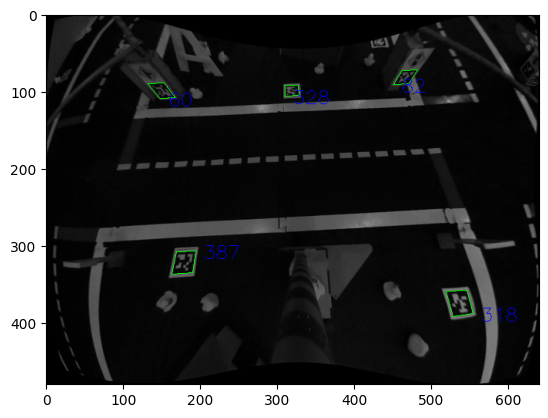

In [ ]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

print(tags[0])

for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    
plt.imshow(color_img)